# 梯度下降法的实现

In [1]:
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
def grad_descent(x0, f1x, x):
    # check if f1x=0 has a solution
    if not sp.solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return None
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()

    # list to store the X values traversed
    X_traversed = []
    while abs(x_old - x_new) > epsilon:
        X_traversed.append(x_new)
        x_old = x_new
        x_new = x_old-step_size*f1x.subs({x:x_old}).evalf()
    return x_new, X_traversed

In [3]:
def frange(start, final, interval):
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    return numbers

def create_plot(X_traversed, f, var):
    # First create the graph of the function itself
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var:x}) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    # calculate the function value at each of the intermediate
    # points traversed
    f_traversed = [f.subs({var:x}) for x in X_traversed]
    plt.plot(X_traversed, f_traversed, 'r.')
    plt.legend(['Function', 'Intermediate points'], loc='best')
    plt.show()

Enter a function in one variable:  x**2 + 2*x + 1
Enter the variable to differentiate with respect to:  x
Enter the initial value of the variable:  0.01


x: -0.995001315693779
Minimum value: 0.0000249868447932400


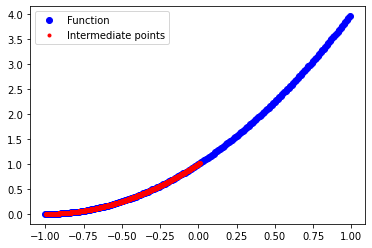

In [4]:
if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sp.sympify(f)
    except sp.core.sympify.SympifyError:
        print('Invalid function entered')
    else:
        var = sp.Symbol(var)
        d = sp.Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({var:var_min})))
            create_plot(X_traversed, f, var)
# x**2 + 2*x + 1    x    0.01